In [1]:
import numpy as np
import IM_rank_correlations as IMR
import measure_classification as mc;
import compute_invariance as compute_invariance;


In [2]:
ranks_matrix = IMR.ranks(IMR.scores_matrix_mix, IMR.measures_arr);
measures_arr = ranks_matrix.measures_arr;
measures_dict = ranks_matrix.measures_dict;

In [3]:
# np.max(ranks_matrix.distance_uppertriangle)

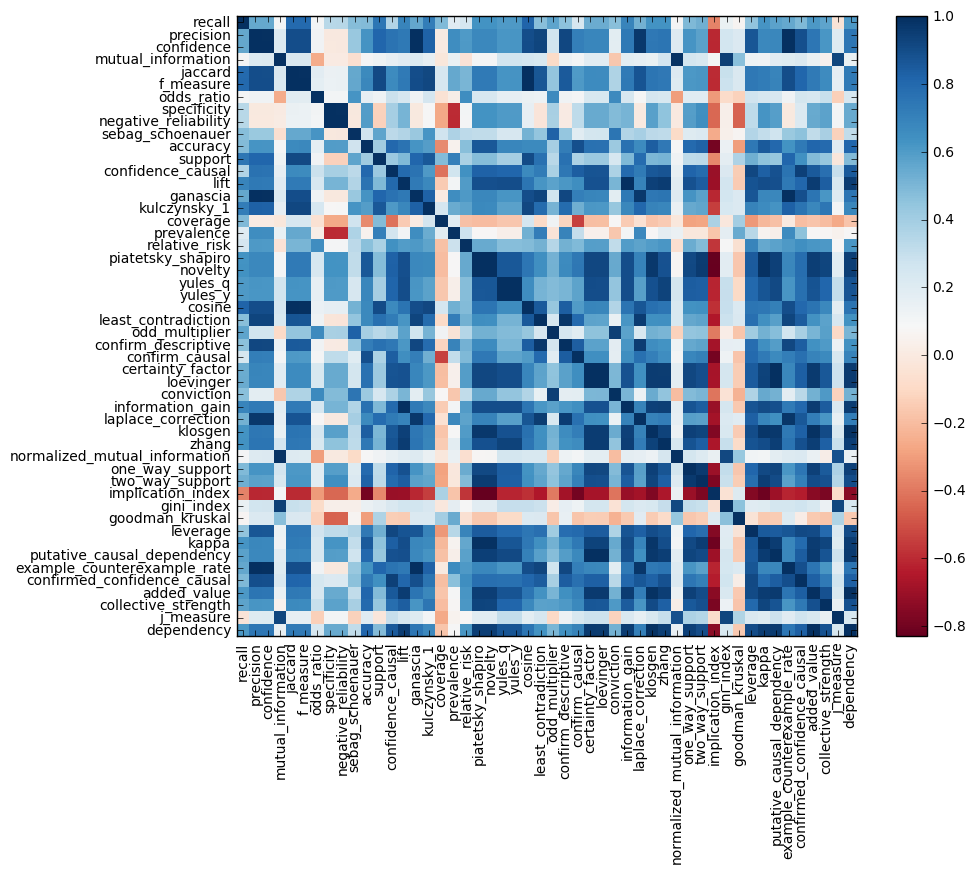

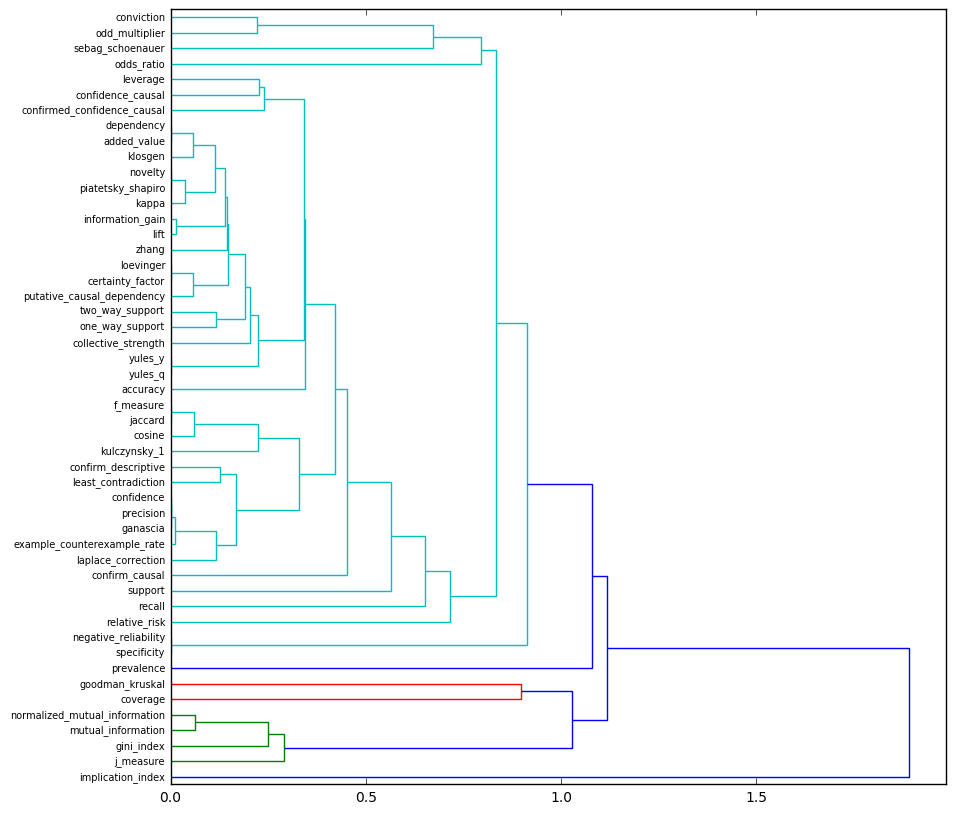

In [4]:
ranks_matrix.visualize(linkage_method='single')

42


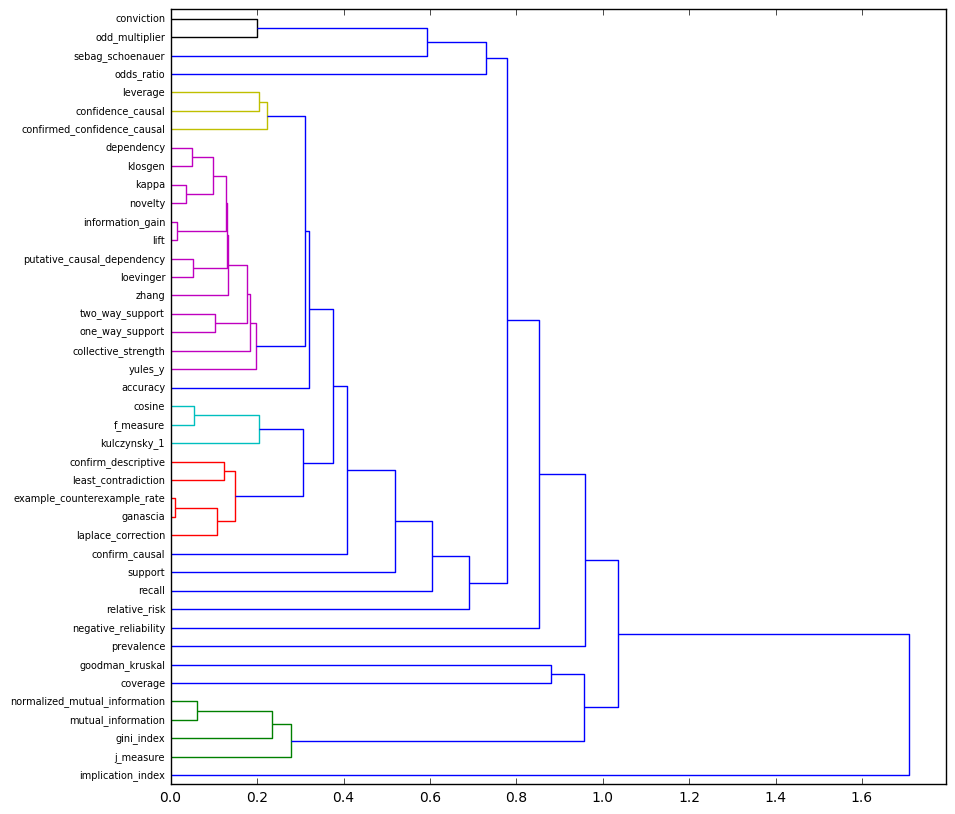

In [5]:
def find_redundant(measures_arr, ranks_matrix):
#     print(len(measures_arr))
    for i in range(len(measures_arr)):
        for j in range(len(measures_arr)):
            if (i > j):
#                 print(ranks_matrix)
                if (np.around(ranks_matrix.corr_spearman[i][j], 4) == 1):
#                     print(measures_arr[i],measures_arr[j], ranks_matrix.corr_spearman[i][j]);
                    return(j);

# remove redundant measures
while find_redundant(measures_arr, ranks_matrix):
    i = find_redundant(measures_arr, ranks_matrix);
    measures_dict, measures_arr = ranks_matrix.remove_outliers(i);
    
print(len(measures_arr))
ranks_matrix.show_dendrogram(linkage_method='single', color_threshold=0.3)

In [6]:
ranks_matrix.corr_spearman[measures_dict['confirm_causal'], measures_dict['accuracy']] 

0.8898076989406154

In [7]:
measures_arr[ranks_matrix.corr_spearman[measures_dict['accuracy']] > 0.85]

array(['accuracy', 'novelty', 'confirm_causal', 'kappa'], 
      dtype='<U29')

In [9]:
# c = form_clusters(18, ranks_matrix);
# print_cluster_set(c, measures_arr)

In [10]:
def find_outlier(clusters):
    arr = []
    for i in range(len(clusters)):
        if len(clusters[i]) == 1:
            arr.append(clusters[i]);
    return np.array(arr);


# while len(find_outlier(clusters)):
#     idx_outliers = find_outlier(clusters);
#     print(measures_arr[idx_outliers]);
#     measures_dict, measures_arr = ranks_matrix.remove_outliers(idx_outliers);
#     clusters = ranks_matrix.form_clusters(n_clusters);

In [11]:
def form_clusters(n_clusters=10, ranks_matrix=ranks_matrix):
    # n_clusters = 10;
    clusters = ranks_matrix.form_clusters(n_clusters);
    return clusters

#prints the measures list in each of the clusters
def print_cluster_set(clusters, ma):
    for idx, cluster in enumerate(clusters):
        print('cluster ',idx);
        print(len(cluster), cluster);        
        print(ma[cluster]);

#forms a cluster vector corresponding to the lengths of the clusters
def form_cluster_set(clusters):
    cluster_vector = np.empty(len(clusters), int);
    for idx, cluster in enumerate(clusters):
        cluster_vector[idx] = len(cluster);
    return cluster_vector;

In [12]:
def cluster_set_singles():
    rm = IMR.ranks(IMR.scores_matrix_mix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(18, rm);
    
    misc_cluster1 = np.array([], int);
    misc_cluster1 = np.append(misc_cluster1, clusters[4]);
    misc_cluster1 = np.append(misc_cluster1, clusters[11]);
    misc_cluster1 = np.append(misc_cluster1, clusters[13]);
    misc_cluster1 = np.append(misc_cluster1, clusters[16]);
    misc_cluster1 = np.append(misc_cluster1, clusters[17]);
    
    
    clusters_new = [];
    
    clusters_new.append(clusters[1]);
    clusters_new.append(np.append(clusters[2], [clusters[0], clusters[7]]));
    clusters_new.append(clusters[8]);
    clusters_new.append(np.append(clusters[9], [clusters[6], clusters[15]]));
    clusters_new.append(np.append(clusters[10], clusters[12]));
    clusters_new.append(np.append(clusters[14], [clusters[5], clusters[3]]));
    clusters_new.append(misc_cluster1);

    clusters_new = np.array(clusters_new);
    return (clusters_new, md, ma);
(clusters_singles, measures_dict_singles, measures_arr_singles) = cluster_set_singles();
# print_cluster_set(clusters_singles, measures_arr_singles)

In [13]:
def cluster_set_1():
    rm = IMR.ranks(IMR.scores_matrix_mix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(9, rm);
    
    misc_cluster1 = np.array([], int);
    misc_cluster1 = np.append(misc_cluster1, clusters[0]);
    misc_cluster1 = np.append(misc_cluster1, clusters[4]);
    misc_cluster1 = np.append(misc_cluster1, clusters[6]);
    misc_cluster1 = np.append(misc_cluster1, clusters[7]);
    misc_cluster1 = np.append(misc_cluster1, clusters[8]);

    clusters_new = [];
    clusters_new.append(clusters[2]);
    clusters_new.append(clusters[5]);
    clusters_new.append(clusters[1]);
    clusters_new.append(clusters[3]);
    clusters_new.append(misc_cluster1);

    clusters_new = np.array(clusters_new);

    return (clusters_new, md, ma);
# print_cluster_set(clusters_1, measures_arr_1)

In [14]:
def cluster_set_2():
    rm = IMR.ranks(IMR.scores_matrix_mix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(2, rm);
    return (clusters, md, ma);

In [15]:
def cluster_set_3():
    rm = IMR.ranks(IMR.scores_matrix_mix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(3, rm);
    return (clusters, md, ma);

In [16]:
def cluster_set_4():
    rm = IMR.ranks(IMR.scores_matrix_mix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(4, rm);
    return (clusters, md, ma);

In [17]:
def cluster_set_5():
    rm = IMR.ranks(IMR.scores_matrix_mix, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(11, rm);
    misc_cluster1 = np.array([], int);
    misc_cluster1 = np.append(misc_cluster1, clusters[0]);
    misc_cluster1 = np.append(misc_cluster1, clusters[2]);
    
    misc_cluster2 = np.array([], int);
    misc_cluster2 = np.append(misc_cluster2, clusters[4]);
    misc_cluster2 = np.append(misc_cluster2, clusters[10]);
    
    misc_cluster3 = np.array([], int);
    misc_cluster3 = np.append(misc_cluster3, clusters[7]);
    misc_cluster3 = np.append(misc_cluster3, clusters[8]);

    misc_cluster4 = np.array([], int);
    misc_cluster4 = np.append(misc_cluster4, clusters[5]);
    misc_cluster4 = np.append(misc_cluster4, clusters[9]);
    
    clusters_new = [];
    clusters_new.append(clusters[1]);
#     clusters_new.append(clusters[2]);
    clusters_new.append(clusters[3]);
    clusters_new.append(clusters[6]);
    clusters_new.append(misc_cluster1);
    clusters_new.append(misc_cluster2);
    clusters_new.append(misc_cluster3);
    clusters_new.append(misc_cluster4);

    clusters_new = np.array(clusters_new);

    return (clusters_new, md, ma);


In [18]:
# c = form_clusters(11, ranks_matrix);
# print_cluster_set(c, measures_arr)
# ranks_matrix.show_dendrogram()

In [19]:
(clusters_1, measures_dict_1, measures_arr_1) = cluster_set_1();
(clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2();
(clusters_3, measures_dict_3, measures_arr_3) = cluster_set_3();
(clusters_4, measures_dict_4, measures_arr_4) = cluster_set_4();
(clusters_5, measures_dict_5, measures_arr_5) = cluster_set_5();


In [22]:
def return_homogeneity(cluster_set, measures_dict):

    #old properties
#     (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

#     # new properties
    (properties_array, property_names) = compute_invariance.compute_new_property_vectors(measures_dict);
# mapping the properties array to the combination of the properties
    (properties_array, property_names) = compute_invariance.map_UN_properties_to_combinations(properties_array);
    (support_array, entropy_array) = compute_invariance.compute_supports_updated(properties_array);
    
    cluster_property_array = compute_invariance.compute_property_frequencies_in_cluster_set_updated(properties_array, cluster_set);
    cluster_vector = form_cluster_set(cluster_set);
    print(cluster_vector);
#     print(properties_array)
    for idx, property_vector in enumerate(cluster_property_array):
        # property_vector is (n_prop_states, n_clusters)
        homo = compute_invariance.compute_homogeneity(property_vector, cluster_vector)
        # Property names
#         print(property_names[idx]);

        # Entropy of split
#         print(entropy_array[idx]);
        
    
    #-----old properties------
        # Original split of properties
#         print([int(np.sum(property_vector[1,:])), int(np.sum(property_vector[0,:]))])

#         print(support_array[idx,1]);     #prints support for each prop_state

        
        # property counts of '-1' in new and '0' in old
#         print(property_vector[0,:]);
        
        # property counts of '0' in new and '1' in old
#         print(property_vector[1,:]);
#         print(homo)        
    
    #------new properties------
        # Original split of properties
#         print([int(np.sum(property_vector[0,:])),
#                int(np.sum(property_vector[1,:])),
#                int(np.sum(property_vector[2,:])),
#               int(np.sum(property_vector[3,:])),
#               int(np.sum(property_vector[4,:])),
#               int(np.sum(property_vector[5,:]))]);

#         print(support_array[idx,0]);     #prints support for each prop_state

        # property counts of '-1' in new 
#         print(property_vector[0,:]);
        
        # property counts of '0' in new
#         print(property_vector[1,:]);
        
        # property counts of '1' in new
#         print(property_vector[2,:]);

        print(homo)

return_homogeneity(clusters_singles, measures_dict_singles);

[ 4  5  3 15  6  4  5]
0.443693969173
0.362520193374
0.487728125972
0.46663088656
0.461195692436
0.395767801723
0.533749447741
0.533749447741
0.421914819518
0.354647250831
0.47022640271
0.492005552365
0.447674901064
0.370393135917
0.4890333807
0.515327885492


In [25]:
# input a cluster set and specify which property and output will be the measures satisfying the properties and their cluster
def cluster_measures_satisfying_property(cluster_set, measures_arr, measures_dict):
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);
    for idx, cluster in enumerate(cluster_set):
        for idc, measure in enumerate(cluster):
            if (properties_array[measure, 1]):
                print(measures_arr[measure], idx)
                
cluster_measures_satisfying_property(clusters_singles, measures_arr_singles, measures_dict_singles)

mutual_information 0
normalized_mutual_information 0
gini_index 0
j_measure 0
f_measure 1
kulczynsky_1 1
cosine 1
recall 1
support 1
confidence_causal 2
leverage 2
confirmed_confidence_causal 2
lift 3
novelty 3
yules_y 3
loevinger 3
information_gain 3
klosgen 3
zhang 3
one_way_support 3
two_way_support 3
kappa 3
putative_causal_dependency 3
collective_strength 3
dependency 3
accuracy 3
confirm_causal 3
ganascia 4
least_contradiction 4
confirm_descriptive 4
laplace_correction 4
example_counterexample_rate 4
odd_multiplier 5
conviction 5
sebag_schoenauer 5
odds_ratio 5
negative_reliability 6
relative_risk 6
goodman_kruskal 6
